In [159]:
from IPython.display import Audio
import os
import numpy as np
import pandas as pd
import librosa
from librosa import display
import scipy
import matplotlib.pyplot as plt
audio_dir = os.getcwd()+"\\audio\\"

%matplotlib inline

In [82]:
# This example is a mockingbird
file = audio_dir + "172648.mp3"

In [83]:
samples, sample_rate = librosa.load(file, sr=None)

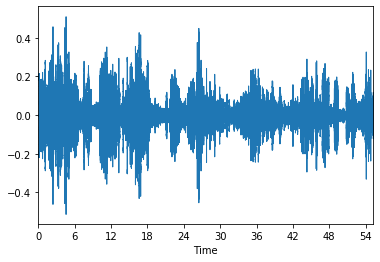

In [84]:
plt.figure()
display.waveplot(y=samples, sr=sample_rate)
plt.show()

In [85]:
sample_rate

48000

In [ ]:
# Borrowed
def spectrogram(samples, sample_rate, stride_ms = 10, 
                          window_ms = 20.0, max_freq = None, eps = 1e-14):

    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples, 
                                          shape = nshape, strides = nstrides)
    
    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]
    
    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2
    
    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale
    
    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])
    
    # Compute spectrogram feature
    ind = np.where(freqs <= max_freq)[0][-1] + 1
    specgram = np.log(fft[:ind, :] + eps)
    return specgram

In [126]:
sg = spectrogram(samples, sample_rate, max_freq=sample_rate/4)

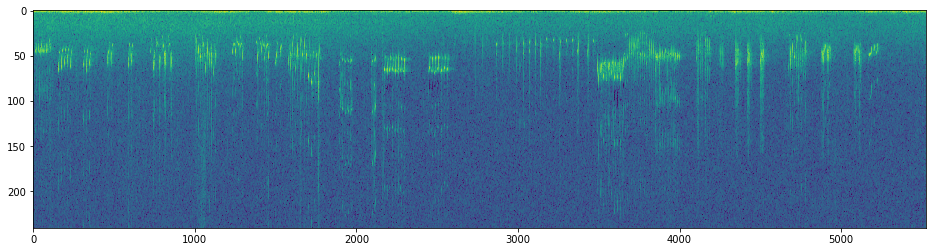

In [127]:
# Spectrograms are fun to look at, but not what I'll be using.
plt.figure(figsize=(16,4))
plt.imshow(sg, cmap='viridis', aspect='auto')
Audio(file)

In [145]:
# Mel-frequency cepstral coefficients have worked better for me for speech in the past.
# Bird songs are kind of like speech, so maybe?
# It's also much fewer features to work with.
mfcc = librosa.feature.mfcc(samples, sample_rate, n_mfcc=22)

In [226]:
mfcc.shape

(22, 5182)

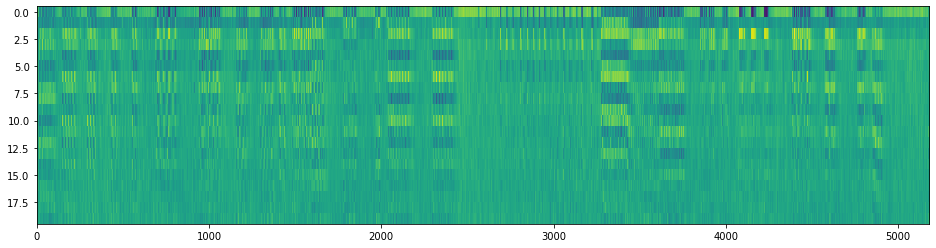

In [146]:
plt.figure(figsize=(16,4))
plt.imshow(mfcc[2:,], cmap='viridis', aspect='auto')
Audio(file)
# 0 and 1 mfccs always seem to be noisy, might as well leave them out.

In [147]:
sg_small = sg.astype('float16')
mfcc_small = mfcc.astype('float16')

In [92]:
# Get a list of files in the folder
files = os.listdir('audio')

In [203]:
# Get class labels
bird_data = pd.read_csv('bird_recordings_texas_final.csv')
#bird_data['species'] = bird_data['species'].astype('str')

In [215]:
class_labels = np.asarray(pd.value_counts(bird_data['species']).axes[0])
bird_data[bird_data['id']==100144]['species'].iloc[0]

'Geothlypis trichas'

In [229]:
# Make MFCCs for all audio files
mfccs = []
for i in range(len(files)):
    print('File', i)
    id_num = int(files[i][:-4])
    label = bird_data[bird_data['id']==id_num]['species'].iloc[0]
    print(label)
    samples, sample_rate = librosa.load('audio/'+files[i], sr=None)
    # Each example has [mfcc x, label y]. Convert to 16 bit floats to save on space.
    mfccs.append([librosa.feature.mfcc(samples, sample_rate, n_mfcc=22).astype('float16'), label])

File 0
Geothlypis trichas
File 1
Setophaga pitiayumi
File 2
Tympanuchus pallidicinctus
File 3
Tympanuchus pallidicinctus
File 4
Vireo atricapilla
File 5
Rallus elegans
File 6
Melanerpes aurifrons
File 7
Melanerpes aurifrons
File 8
Melanerpes aurifrons
File 9
Thryomanes bewickii
File 10
Mimus polyglottos
File 11
Baeolophus atricristatus
File 12
Aphelocoma wollweberi
File 13
Aphelocoma wollweberi
File 14
Leiothlypis crissalis
File 15
Leiothlypis crissalis
File 16
Icteria virens
File 17
Icteria virens
File 18
Aimophila ruficeps
File 19
Aimophila ruficeps
File 20
Poecile carolinensis
File 21
Mimus polyglottos
File 22
Peucaea aestivalis
File 23
Aimophila ruficeps
File 24
Arremonops rufivirgatus
File 25
Agelaius phoeniceus
File 26
Poecile carolinensis
File 27
Poecile carolinensis
File 28
Poecile carolinensis
File 29
Poecile carolinensis
File 30
Poecile carolinensis
File 31
Cyanocitta cristata
File 32
Thryothorus ludovicianus
File 33
Catherpes mexicanus
File 34
Thryothorus ludovicianus
File 3

File 289
Piranga rubra
File 290
Setophaga dominica
File 291
Setophaga dominica
File 292
Setophaga citrina
File 293
Thryothorus ludovicianus
File 294
Piranga rubra
File 295
Setophaga citrina
File 296
Cyanocitta cristata
File 297
Vireo griseus
File 298
Vireo griseus
File 299
Setophaga citrina
File 300
Peucaea aestivalis
File 301
Tympanuchus pallidicinctus
File 302
Tympanuchus pallidicinctus
File 303
Tympanuchus pallidicinctus
File 304
Tympanuchus pallidicinctus
File 305
Tympanuchus pallidicinctus
File 306
Poecile carolinensis
File 307
Spizella atrogularis
File 308
Myiarchus cinerascens
File 309
Myiarchus cinerascens
File 310
Spizella atrogularis
File 311
Spizella atrogularis
File 312
Spizella atrogularis
File 313
Myiarchus cinerascens
File 314
Myiarchus cinerascens
File 315
Leiothlypis crissalis
File 316
Baeolophus atricristatus
File 317
Leiothlypis crissalis
File 318
Leiothlypis crissalis
File 319
Leiothlypis crissalis
File 320
Leiothlypis crissalis
File 321
Vireo bellii
File 322
Vireo 

In [230]:
# Total compressed size is about 100 MB
np.savez_compressed('data.npz', mfccs)